<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/9_5_Recurrent_Neural_Network_Implementation_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.5 : 

In [ ]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

In [ ]:
%matplotlib inline
import math
import torch
from torch import nn
import torch.nn.functional as F
from d2l import torch as d2l

In [ ]:
class RNNScratch(d2l.Module):

  def __init__(self, num_inputs, num_hiddens, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.W_xh = nn.Parameter(
        torch.randn(num_inputs, num_hiddens) * sigma
    )
    self.W_hh = nn.Parameter(
        torch.randn(num_hiddens, num_hiddens) * sigma
    )
    self.b_h = nn.Parameter(
        torch.zeros(num_hiddens)
    )

  def forward(self, inputs, state=None):
    
    if state is not None:
      state, = state
    outputs = []
    for X in inputs: 
      # shape of inputs <-- (num_steps, batch_size, num_inputs)
     state = torch.tanh(torch.matmul(X, self.W_xh) + (torch.matmul(state, self.W_hh) if state is not None else 0) + self.b_h)
     outputs.append(state)
    return(outputs, state)

In [ ]:
batch_size, num_inputs, num_hiddens, num_steps = 2, 16, 32, 100
rnn = RNNScratch(num_inputs, num_hiddens)
X = torch.ones(num_steps, batch_size, num_inputs)
print(X.shape)
out, state = rnn(X)
print(f"len of outputs = {len(out)}")
print(f"state.shape = {state.shape}")

torch.Size([100, 2, 16])
len of outputs = 100
state.shape = torch.Size([2, 32])


In [ ]:
f"list\'s"

"list's"

In [ ]:
def check_len(a, n):
  assert len(a) == n, f"list\'s len {len(a)} != expected length {n}"


def check_shape(a, shape):
  assert a.shape == shape, \
  f"tensor\'s shape {a.shape} != Expected Shape {shape}"

In [ ]:
check_len(out, num_steps)

In [ ]:
check_shape(out[0], (batch_size, num_hiddens))
check_shape(state, (batch_size, num_hiddens))

In [ ]:
d2l.Classifier.loss?

In [ ]:
a = torch.ones(100, 2, 16)
print(a.shape)
b = a[-1]
print(b.shape)

torch.Size([100, 2, 16])
torch.Size([2, 16])


In [ ]:
a = torch.rand(10, 3, 2)
print(a.shape)

torch.Size([10, 3, 2])


In [ ]:
print(a[:-1].shape)
print(a[:-1])

torch.Size([9, 3, 2])
tensor([[[0.7126, 0.4726],
         [0.9259, 0.5111],
         [0.3502, 0.3303]],

        [[0.9208, 0.4462],
         [0.7587, 0.3250],
         [0.9978, 0.5440]],

        [[0.1232, 0.5379],
         [0.0471, 0.3939],
         [0.2899, 0.7078]],

        [[0.9522, 0.8294],
         [0.9287, 0.2837],
         [0.7620, 0.7485]],

        [[0.4247, 0.7593],
         [0.4197, 0.1098],
         [0.2613, 0.3808]],

        [[0.4810, 0.0296],
         [0.9778, 0.4559],
         [0.7073, 0.1028]],

        [[0.9024, 0.4746],
         [0.6464, 0.4255],
         [0.4191, 0.4923]],

        [[0.4677, 0.7543],
         [0.1768, 0.6477],
         [0.2611, 0.5645]],

        [[0.8766, 0.4540],
         [0.6950, 0.3095],
         [0.8287, 0.6018]]])


In [ ]:
a

tensor([[[0.7126, 0.4726],
         [0.9259, 0.5111],
         [0.3502, 0.3303]],

        [[0.9208, 0.4462],
         [0.7587, 0.3250],
         [0.9978, 0.5440]],

        [[0.1232, 0.5379],
         [0.0471, 0.3939],
         [0.2899, 0.7078]],

        [[0.9522, 0.8294],
         [0.9287, 0.2837],
         [0.7620, 0.7485]],

        [[0.4247, 0.7593],
         [0.4197, 0.1098],
         [0.2613, 0.3808]],

        [[0.4810, 0.0296],
         [0.9778, 0.4559],
         [0.7073, 0.1028]],

        [[0.9024, 0.4746],
         [0.6464, 0.4255],
         [0.4191, 0.4923]],

        [[0.4677, 0.7543],
         [0.1768, 0.6477],
         [0.2611, 0.5645]],

        [[0.8766, 0.4540],
         [0.6950, 0.3095],
         [0.8287, 0.6018]],

        [[0.7299, 0.5175],
         [0.5447, 0.8006],
         [0.5513, 0.2256]]])

In [ ]:
a[:-1].shape

torch.Size([99, 2, 16])

In [ ]:
a = [torch.randn(1, 2), torch.randn(1, 2), torch.randn(1, 2)]
b = torch.stack(a, dim=1)
print(b.shape)

torch.Size([1, 3, 2])


In [ ]:
torch.stack??

In [ ]:
class RNNLMScratch(d2l.Classifier):

  def __init__(self, rnn, vocab_size, lr=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.init_params()

  def init_params(self):
    self.W_hq = nn.Parameter(
        torch.randn(self.rnn.num_hiddens, self.vocab_size) * self.rnn.sigma
    )
    self.b_q = nn.Parameter(
        torch.zeros(self.vocab_size)
    )

  def training_step(self, batch):
    l = self.loss(self(*batch[:-1]), batch[-1])
    #batch[:-1] : gives all elements of batch except the last element
    self.plot('ppl', torch.exp(l), train=True)
    return l

  def validation_step(self, batch):
    l = self.loss(self(*batch[:-1]), batch[-1])
    self.plot("ppl", torch.exp(l), train=False)

  def one_hot(self, X):
    # one_hot requires the dtype torch.int64
    # X.shape = (batch_size, num_steps)
    # outputs.shape = (num_steps, batch_size, vocab_size)
    return F.one_hot(X.T, num_classes=self.vocab_size).type(torch.float32)

  def output_layer(self, rnn_outputs):
    outputs = [(torch.mm(state, self.W_hq) + self.b_q) for state in rnn_outputs]
    return torch.stack(outputs, 1)

  def forward(self, X, state=None):
    embs = self.one_hot(X)
    rnn_outputs,_ = self.rnn(embs, state)
    return self.output_layer(rnn_outputs)

In [ ]:
model = RNNLMScratch(rnn, num_inputs)
inputs = torch.ones(batch_size, num_steps, dtype=torch.int64)
print(f"inputs.dtype = {inputs.dtype}")
print(f"inputs.shape = {inputs.shape}")
outputs = model(inputs)
print(f"outputs.shape = {outputs.shape}")
print(f"outputs.dtype = {outputs.dtype}")

inputs.dtype = torch.int64
inputs.shape = torch.Size([2, 100])
outputs.shape = torch.Size([2, 100, 16])
outputs.dtype = torch.float32


In [ ]:
F.one_hot(torch.tensor([0, 2]), 5)

tensor([[1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0]])

In [ ]:
b = torch.arange(6, dtype=torch.int64).reshape(2, 3)
print(b)
print(f"b.shape = {b.shape}")
# c = F.one_hot(b, 7)
# print(c)

tensor([[0, 1, 2],
        [3, 4, 5]])
b.shape = torch.Size([2, 3])


In [ ]:
c = F.one_hot(b, num_classes=-1)
print(c)
print(c.dtype)
d = c.type(torch.float32)
print(d.dtype)
print(d)

tensor([[[1, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0]],

        [[0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 1]]])
torch.int64
torch.float32
tensor([[[1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0.]],

        [[0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 1.]]])


In [ ]:
net = nn.Sequential(
    nn.Linear(10, 20), nn.LazyBatchNorm1d(), nn.ReLU(),
    nn.Linear(20, 1)
)

inp = torch.randn(2, 10)
out = net(inp)
print(out.shape)

torch.Size([2, 1])


In [ ]:
params = [p for p in net.parameters() if p.requires_grad==True]
params

[Parameter containing:
 tensor([[-0.2326,  0.2412, -0.3147, -0.2119,  0.3026, -0.2573,  0.2515,  0.1264,
          -0.1258, -0.0688],
         [-0.2392,  0.2581,  0.0703, -0.2232, -0.0649, -0.2969,  0.0939,  0.2762,
          -0.2947, -0.1817],
         [-0.1639,  0.0859,  0.0936,  0.2296, -0.0570,  0.2643,  0.0675, -0.1226,
           0.0595, -0.1508],
         [-0.2462, -0.2890,  0.1940,  0.1582, -0.1371, -0.1032, -0.1845,  0.1607,
          -0.0323, -0.0264],
         [ 0.2319,  0.1711, -0.2262,  0.1657, -0.0635, -0.0225, -0.2821, -0.1235,
          -0.0108,  0.1213],
         [-0.3138, -0.2777,  0.1901, -0.0995,  0.2713,  0.0050,  0.2564,  0.1289,
           0.0974,  0.1901],
         [-0.1649,  0.1263, -0.1695,  0.0464, -0.0392, -0.0913, -0.2528,  0.2151,
           0.2734,  0.1728],
         [-0.2389,  0.3102, -0.0936, -0.1724,  0.3156,  0.2768,  0.0330, -0.0489,
           0.2980, -0.2053],
         [-0.2412, -0.1481, -0.0454, -0.2664, -0.2254,  0.2090, -0.2644, -0.3085,
       

In [ ]:
torch.sum??

In [ ]:
@d2l.add_to_class(d2l.Trainer)
def clip_gradients(self, grad_clip_val, model):
  params = [p for p in model.parameters() if p.requires_grad==True]
  norm = torch.sqrt(sum(torch.sum(p.grad ** 2) for p in params))
  if norm > grad_clip_val:
    for param in params:
      param.grad[:] *= grad_clip_val / norm

In [ ]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)

In [ ]:
len(data.vocab)

28

In [ ]:
data.vocab.token_freqs

[(' ', 32775),
 ('e', 17838),
 ('t', 13515),
 ('a', 11704),
 ('i', 10138),
 ('n', 9917),
 ('o', 9758),
 ('s', 8486),
 ('h', 8257),
 ('r', 7674),
 ('d', 6337),
 ('l', 6146),
 ('m', 4043),
 ('u', 3805),
 ('c', 3424),
 ('f', 3354),
 ('w', 3225),
 ('g', 3075),
 ('y', 2679),
 ('p', 2427),
 ('b', 1897),
 ('v', 1295),
 ('k', 1087),
 ('x', 236),
 ('z', 144),
 ('j', 97),
 ('q', 95)]

training took around 2min 19sec on gpu

In [ ]:
data.vocab.token_to_idx

{' ': 0,
 '<unk>': 1,
 'a': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'h': 9,
 'i': 10,
 'j': 11,
 'k': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'q': 18,
 'r': 19,
 's': 20,
 't': 21,
 'u': 22,
 'v': 23,
 'w': 24,
 'x': 25,
 'y': 26,
 'z': 27}

In [ ]:
data.vocab["h"], data.vocab['a']

(9, 2)

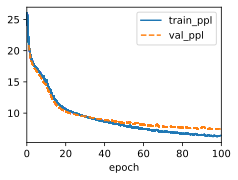

In [ ]:
rnn = RNNScratch(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLMScratch(rnn, vocab_size=len(data.vocab), lr=1)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [ ]:
a = [data.vocab['h'], data.vocab['e']]
print(a)

[9, 6]


In [ ]:
b = torch.tensor([[a[-1]]])
print(b.shape)
print(b)

torch.Size([1, 1])
tensor([[6]])


In [ ]:
F.one_hot(b, num_classes=28).shape

torch.Size([1, 1, 28])

In [ ]:
a = torch.rand(1, 1, 16)
print(a)

tensor([[[0.7726, 0.4411, 0.8196, 0.2779, 0.1338, 0.0892, 0.1368, 0.2739,
          0.2542, 0.5897, 0.0358, 0.6154, 0.7465, 0.1996, 0.2353, 0.6133]]])


In [ ]:
i = torch.argmax(a, dim=2)
print(i)
print(i.shape)

tensor([[2]])
torch.Size([1, 1])


In [ ]:
type(i.item())

int

In [ ]:
i.reshape(1)

tensor([2])

In [ ]:
data.vocab.idx_to_token

[' ',
 '<unk>',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [ ]:
torch.argmax??

In [ ]:
@d2l.add_to_class(RNNLMScratch)
def predict(self, prefix, num_preds, vocab, device=None):
  state, outputs = None, [vocab[prefix[0]]]
  for i in range(len(prefix) + num_preds - 1):
    X = torch.tensor([[outputs[-1]]], device=device)
    embs = self.one_hot(X)
    rnn_outputs, state = self.rnn(embs, state)

    if i < len(prefix) - 1:
      # warm up period
      outputs.append(vocab[prefix[i+1]])

    else:
      # predict 'num_preds' steps
      Y = self.output_layer(rnn_outputs)
      ind = torch.argmax(Y, dim=2).item()
      outputs.append(ind)

  return "".join([vocab.idx_to_token[i] for i in outputs])

In [ ]:
model.predict("my dad is a time", 10000, vocab=data.vocab, device="cuda")

## Ex 9.5 : 

### Q4:

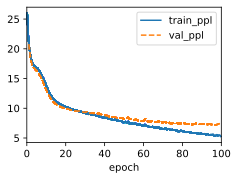

In [ ]:
rnn = RNNScratch(len(data.vocab), num_hiddens=64)
model = RNNLMScratch(rnn, len(data.vocab), lr=1)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=10, num_gpus=1)
trainer.fit(model, data)

In [ ]:
model.predict("once upon a time", 50, data.vocab, device="cuda")

'once upon a time traveller and the time traveller and the time tra'

### Q9 : try without gradient clipping

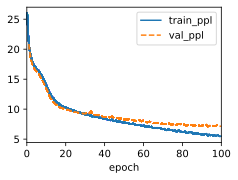

In [ ]:
rnn = RNNScratch(len(data.vocab), num_hiddens=64)
model = RNNLMScratch(rnn, len(data.vocab), lr=1)
trainer = d2l.Trainer(max_epochs=100, num_gpus=1)
trainer.fit(model, data)

In [ ]:
model.predict("once upon a time", 50, data.vocab, device="cuda")

'once upon a time the time traveller a dinne we the time travel sai'

### Q10:



In [ ]:
torch.relu()

In [ ]:
class RNNScratch_mod(d2l.Module):

  def __init__(self, num_inputs, num_hiddens, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.W_xh = nn.Parameter(
        torch.randn(num_inputs, num_hiddens) * sigma
    )
    self.W_hh = nn.Parameter(
        torch.randn(num_hiddens, num_hiddens) * sigma
    )
    self.b_h = nn.Parameter(
        torch.zeros(num_hiddens)
    )

  def forward(self, inputs, state=None):
    
    if state is not None:
      state, = state
    outputs = []
    for X in inputs: 
      # shape of inputs <-- (num_steps, batch_size, num_inputs)
     state = torch.relu(torch.matmul(X, self.W_xh) + (torch.matmul(state, self.W_hh) if state is not None else 0) + self.b_h)
     outputs.append(state)
    return(outputs, state)

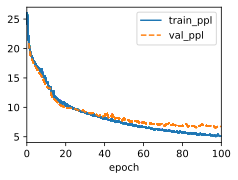

In [ ]:
rnn = RNNScratch_mod(len(data.vocab), num_hiddens=64)
model = RNNLMScratch(rnn, len(data.vocab), lr=1)
trainer = d2l.Trainer(max_epochs=100, num_gpus=1)
trainer.fit(model, data)

In [ ]:
model.predict("she is beautiful", 50, data.vocab, device="cuda")

'she is beautifule the time the the thing the time the the thing th'

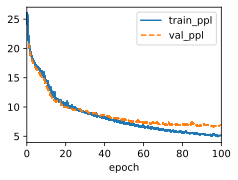

In [ ]:
rnn = RNNScratch_mod(len(data.vocab), num_hiddens=64)
model = RNNLMScratch(rnn, len(data.vocab), lr=1)
trainer = d2l.Trainer(max_epochs=100, num_gpus=1, gradient_clip_val=1)
trainer.fit(model, data)

In [ ]:
model.predict("i would love to travel back in time", 50, data.vocab, device="cuda")

'i would love to travel back in time trav the thing the prest the thre said the thre s'